# GRIP June 2023 @ The Sparks Foundation

# By: Mr Jitesh Juneja

# Task: Exploratory Data Analysis - Retail

**Problem Statement:** Conduct Exploratory Data Analysis (EDA) on the 'SampleSuperstore' dataset as a Business Manager with the objective of identifying potential areas of improvement for maximizing profitability.

# Importing required libraries

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting grid style for plots
sns.set(style="darkgrid")

**Importing the dataset**

In [4]:
df = pd.read_csv('SampleSuperstore.csv')

**Verifying the head of the dataframe**

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#setting the column width to max to read the description
pd.set_option('display.max_colwidth', None)

#setting the max display of output
pd.set_option('display.max_rows', None)

**We will begin by cleaning the data, followed by a detailed analysis of various factors.**

In [7]:
#Checking the shape:
df.shape

(9994, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
#Checking the columns:
print(list(df.columns ), end='')

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']

# 1. Verifying the correct data types:

In [11]:
data_type = df.dtypes
data_type

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [12]:
#Setting the max display of output for columns and checking the head to verify the correct data type:
pd.set_option('display.max_columns', None)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
object_columns = df.select_dtypes(include=np.object).columns
object_columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [14]:
number_columns = df.select_dtypes(include=np.number).columns
number_columns 

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

**The data and the corresponding data types are set correctly**

# 2.Checking for Missing values and handling them

In [15]:
#Checking missing values:
df_null = df.isnull().sum().sort_values(ascending = False)
df_null.head(15)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**There are no null values.**

# Count of distinct values in each column

In [16]:
for i in df.columns:
    print(i, len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


# Data Visualization

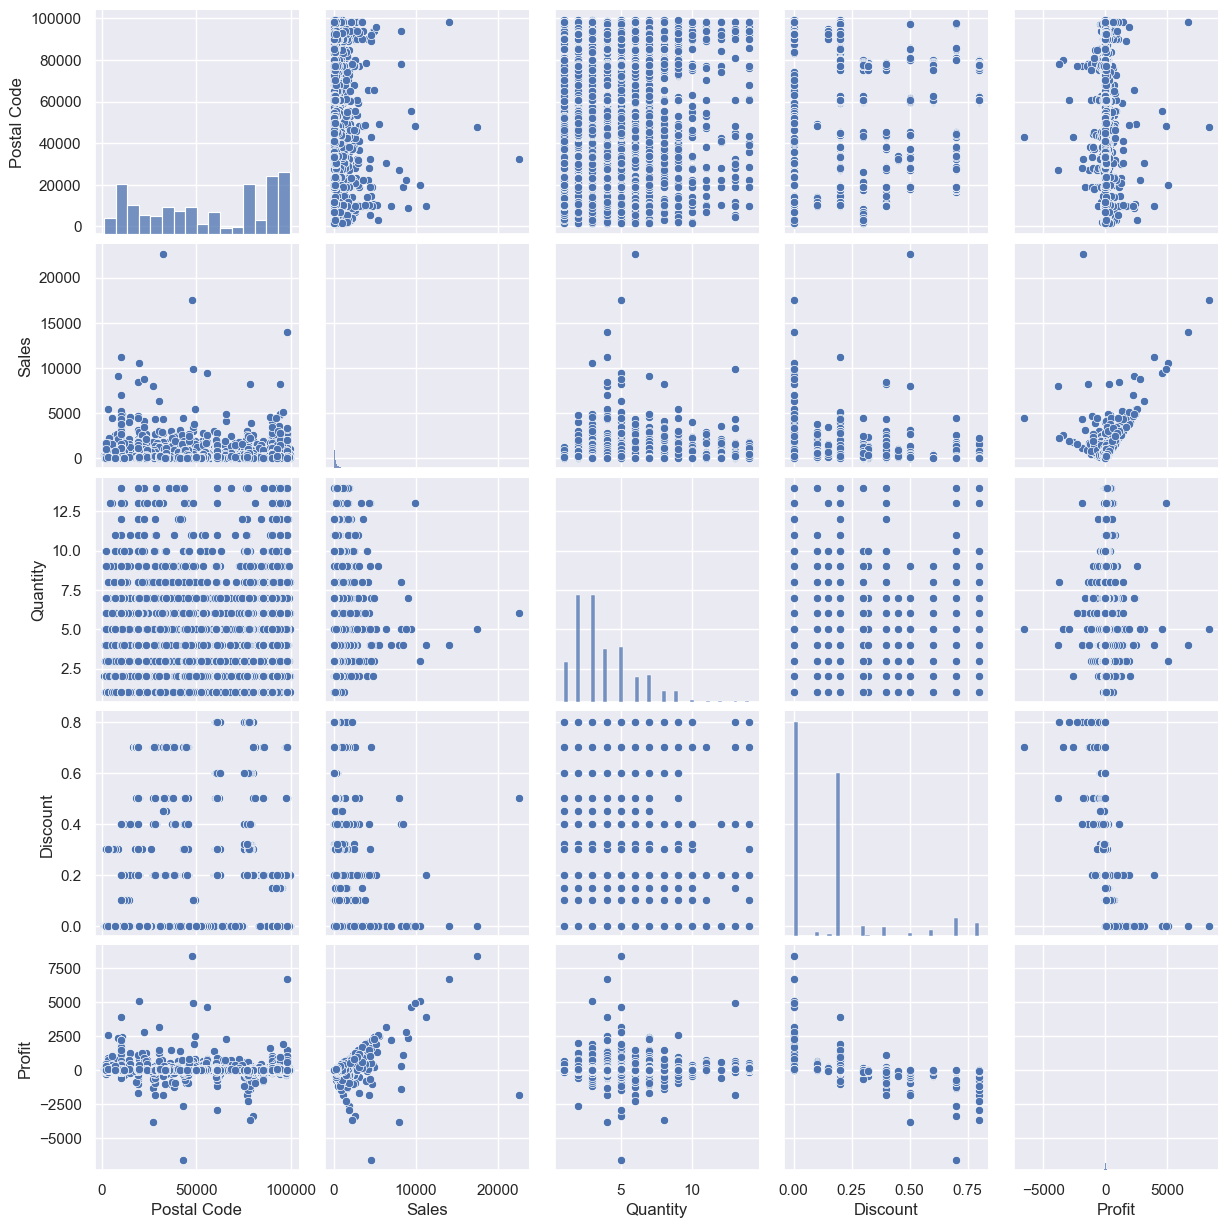

In [17]:
sns.pairplot(df)

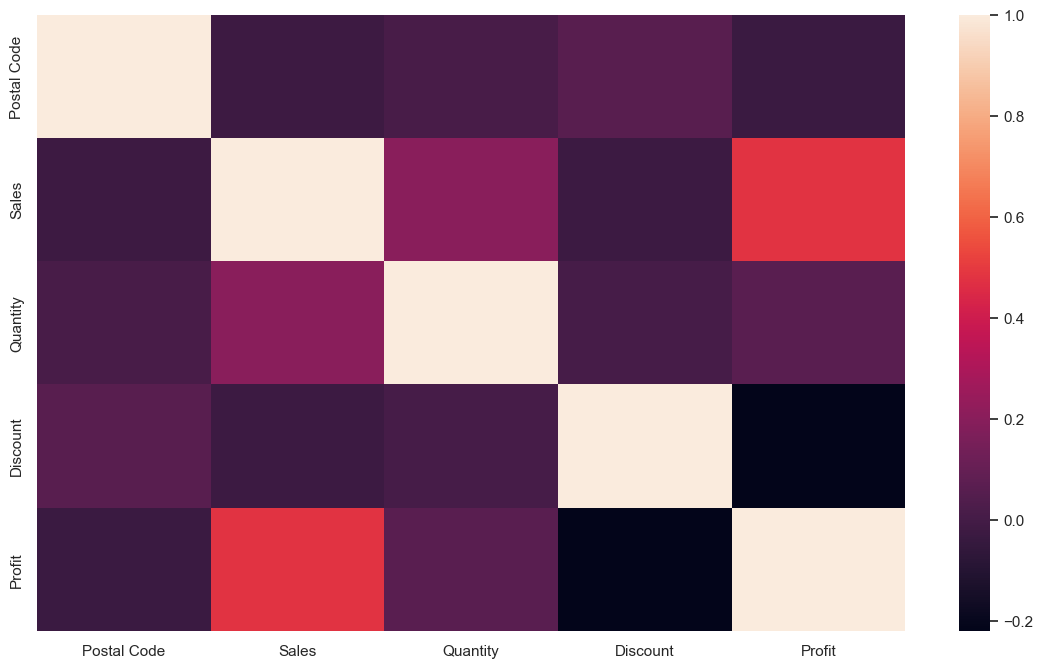

In [21]:
fig,axes = plt.subplots(1,1,figsize=(14,8))
sns.heatmap(df.corr())
plt.show()

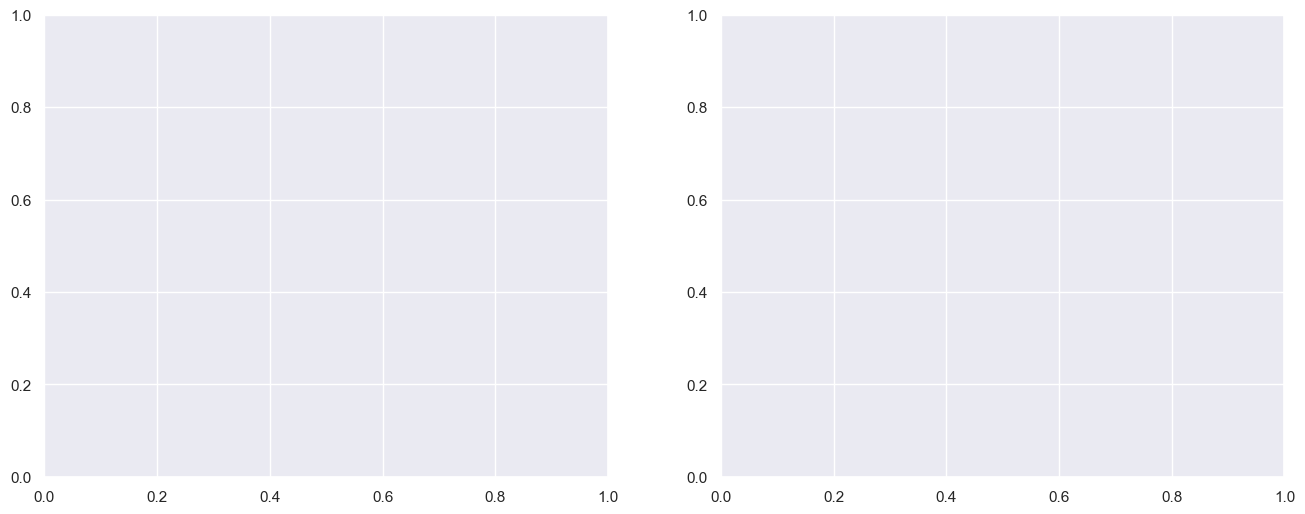

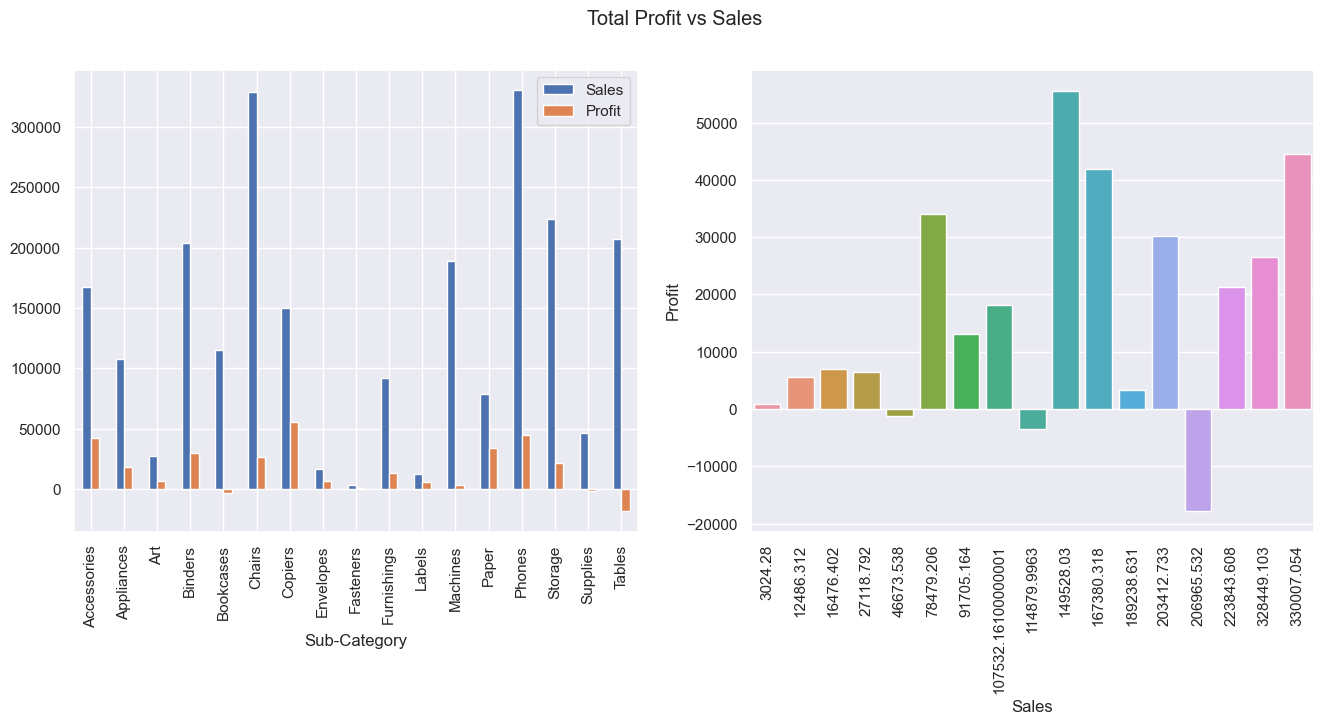

In [23]:
fig,axes = plt.subplots(1,2, figsize = (16,6))
fig.suptitle("Total Profit vs Sales")
sns.barplot(data = df.groupby('Sub-Category')['Sales','Profit'].agg(sum), x = 'Sales', y = 'Profit', ax = axes[1])
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind = 'bar', ax = axes[0])
plt.xticks(rotation = 90)
plt.show()

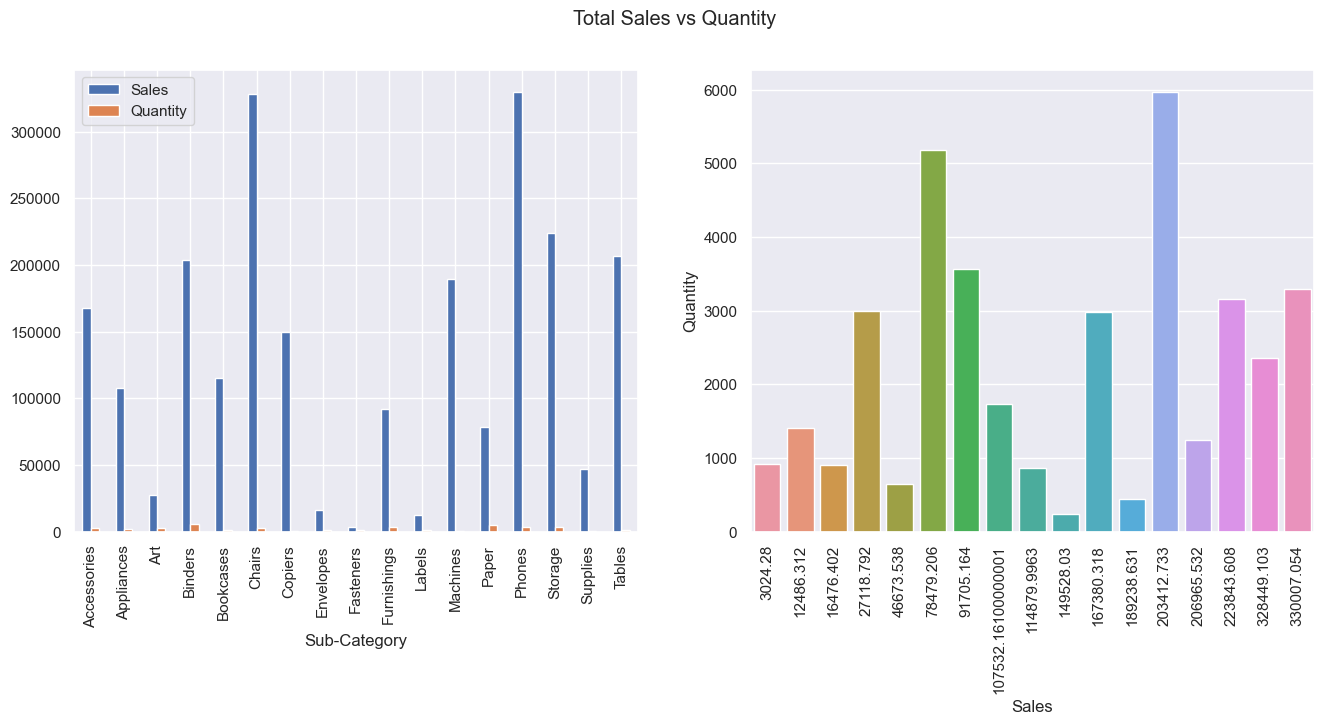

In [24]:
fig,axes = plt.subplots(1,2, figsize = (16,6))
fig.suptitle("Total Sales vs Quantity")
sns.barplot(data = df.groupby('Sub-Category')['Sales','Quantity'].agg(sum), x = 'Sales', y = 'Quantity', ax = axes[1])
df.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind = 'bar', ax = axes[0])
plt.xticks(rotation = 90)
plt.show()

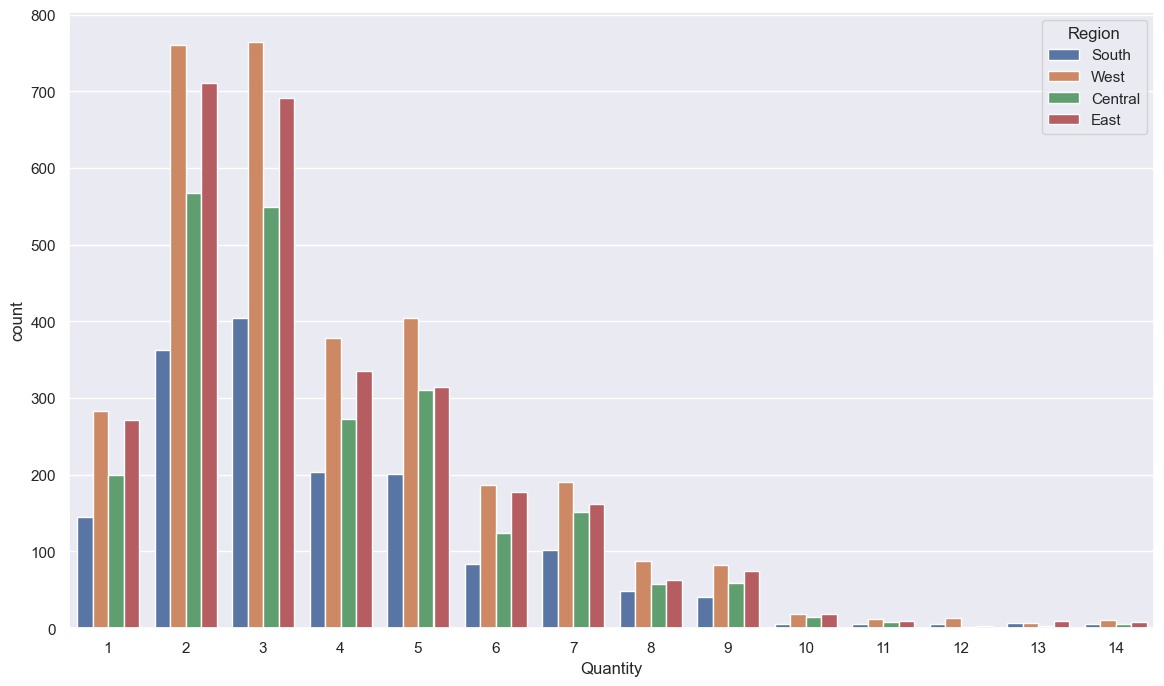

In [25]:
fig,ax = plt.subplots(1,1,figsize = (14,8))
sns.countplot(df['Quantity'], hue = df['Region'])
plt.show()

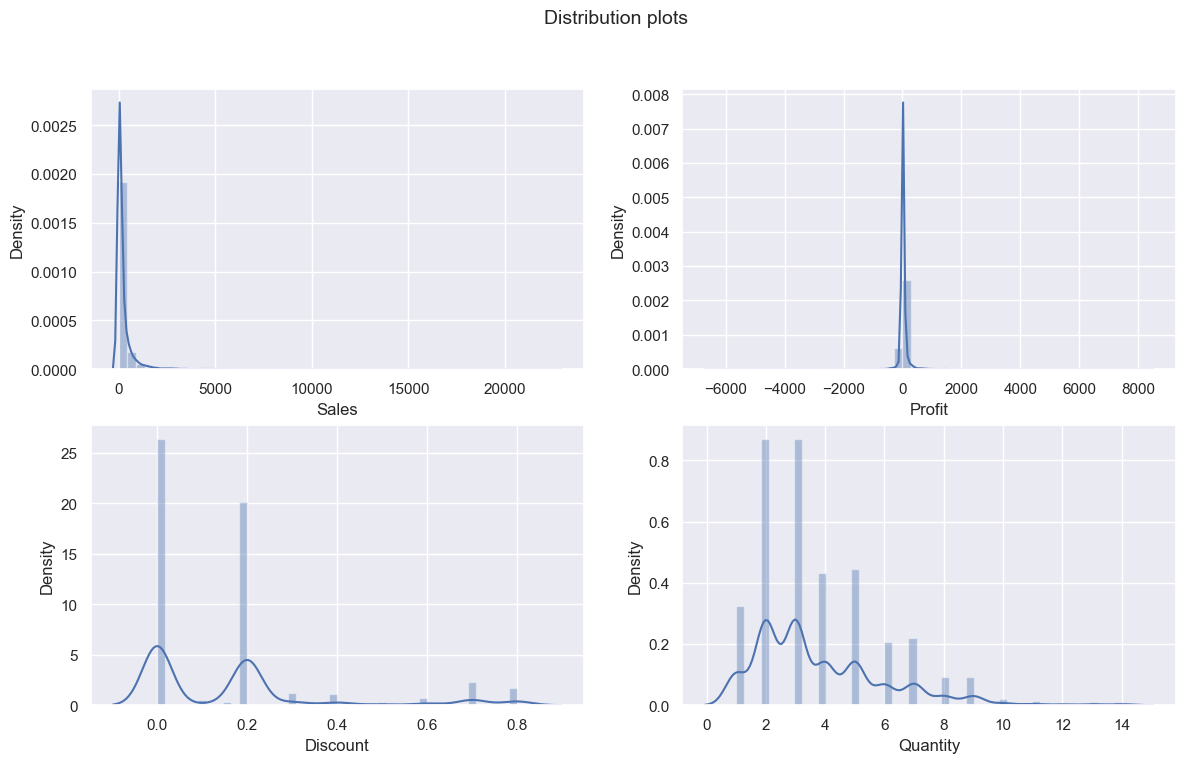

In [31]:
fig,axes = plt.subplots(2,2,figsize = (14,8))
fig.suptitle("Distribution plots", fontsize = 14)
sns.distplot(df['Sales'], ax = axes[0,0])
sns.distplot(df['Profit'], ax = axes[0,1])
sns.distplot(df['Discount'], ax = axes[1,0])
sns.distplot(df['Quantity'], ax = axes[1,1])
plt.show()

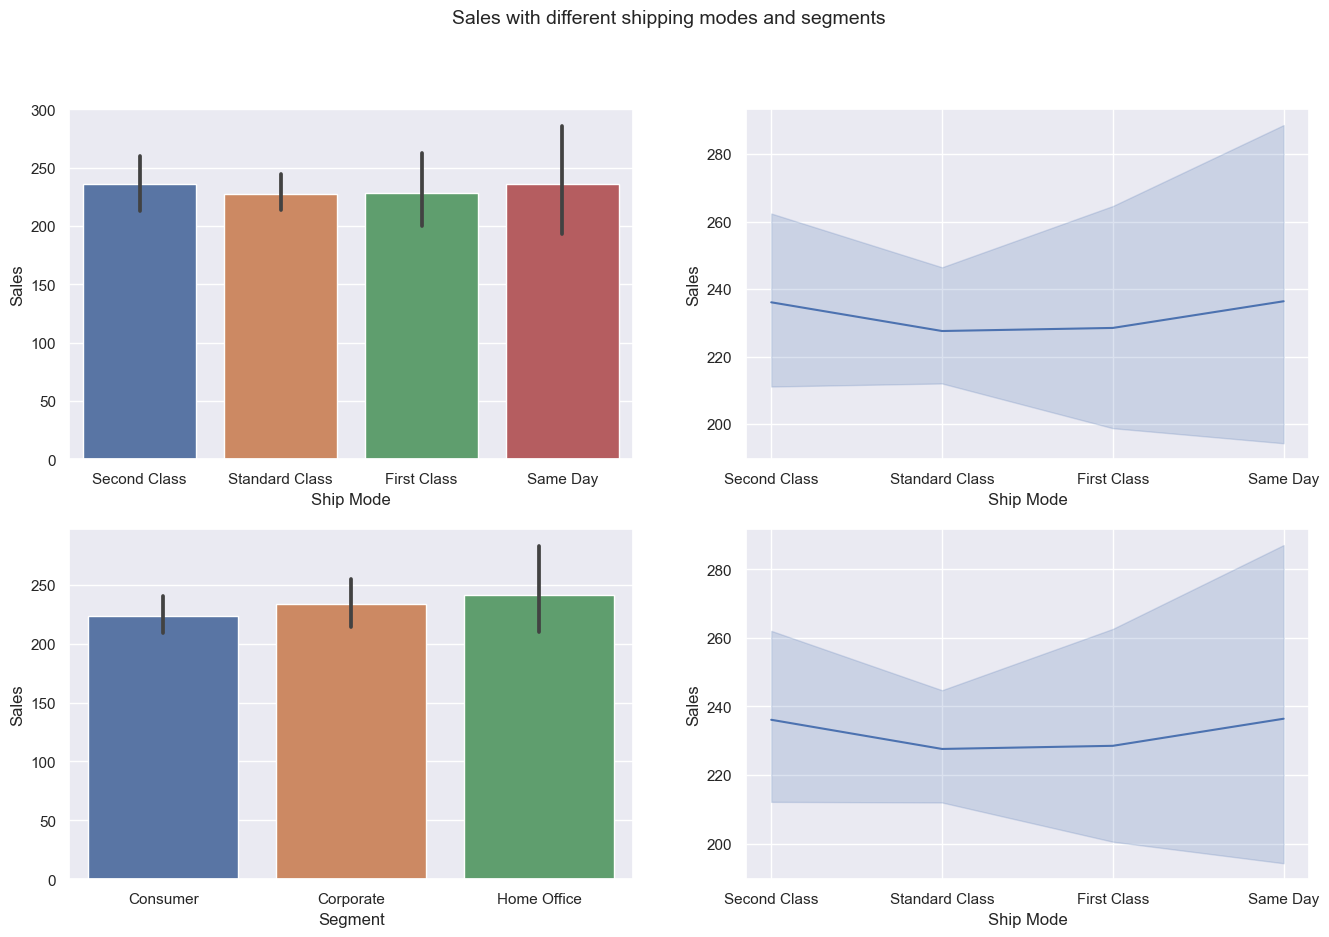

In [30]:
fig,axes = plt.subplots(2,2, figsize = (16,10))
fig.suptitle("Sales with different shipping modes and segments", fontsize = 14)
sns.barplot(df['Ship Mode'], df['Sales'],ax=axes[0,0])
sns.lineplot(df['Ship Mode'],df['Sales'],ax = axes[0,1])
sns.barplot(df['Segment'],df['Sales'],ax = axes[1,0])
sns.lineplot(df['Ship Mode'],df['Sales'],ax = axes[1,1])
plt.show()

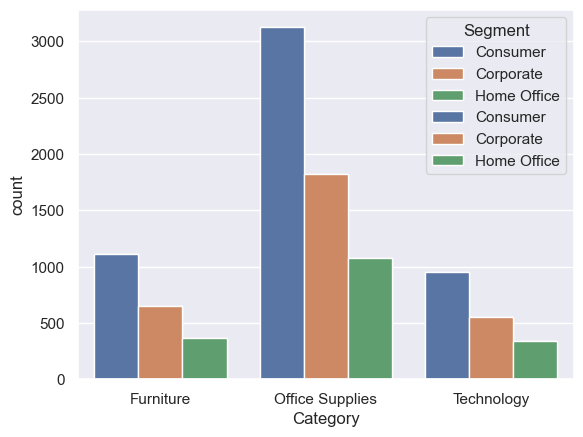

In [33]:
sns.countplot(data= df, x='Category', hue ='Segment')
plt.show()

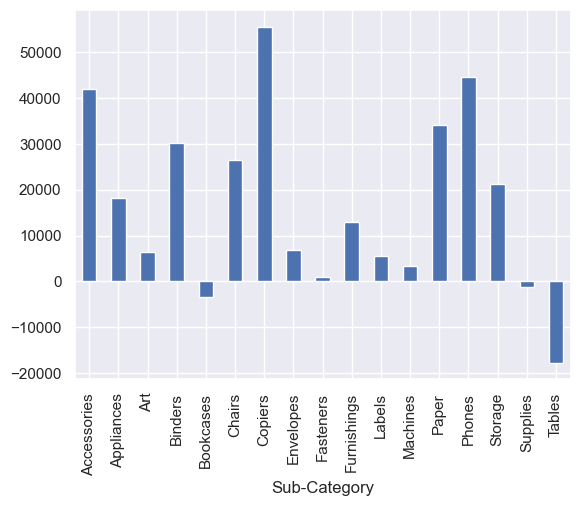

In [34]:
df.groupby('Sub-Category')['Profit'].sum().plot.bar()
plt.show()

# Result

The Sub-Category items 'Bookcases', 'Supplies', and 'Tables' have incurred losses, emphasizing the need for specific attention and focus on these areas.

The Category 'Office supplies' achieves the highest sales, primarily driven by the Consumer segment, which represents the largest customer base.